# Python Data Analysis Library (Pandas)

In [32]:
import pandas as pd

 - Library to handle big datasets
 - Is build on numpy
 - Many feature to simplify working with datasets interactively
 - Pandas is convenience added on top of Numpy
   - Not fundamentally required, you can do everything with just Numpy
   - But Pandas makes organising data easier and works well in Jupyter notebooks
 - Useful new objects:
   - pandas.Series()
   - pandas.DataFrame()

In [33]:
import numpy as np

### pandas.Series
 - One dimensional Object
 - Similar to arrays

In [34]:
a = np.array([2, 4, 3, 6, 7])
s1 = pd.Series(a)
s1

0    2
1    4
2    3
3    6
4    7
dtype: int64

 - Default indices are 0,1,2,3...
 - Can be set to any value similar to keys in dictionaries

In [35]:
indices = ["a", "b", "c", "d", "e"]
s2 = pd.Series(a, index=indices)
s2

a    2
b    4
c    3
d    6
e    7
dtype: int64

 - Series can be initialised using dictionaries
 - Keys are used as indices

In [36]:
d = {"a": 2, "b": 4, "c": 3, "d": 5}
s3 = pd.Series(d)
s3

a    2
b    4
c    3
d    5
dtype: int64

* Series elements can be accessed similar to array elements

In [37]:
s3[2]

3

* Or like dictionaries

In [38]:
s3["c"]

3

* Slicing is possible

In [39]:
s3[1:4]

b    4
c    3
d    5
dtype: int64

In [40]:
s3["b":"d"]

b    4
c    3
d    5
dtype: int64

* Math operations work the same way as with arrays

In [41]:
s3 + 2

a    4
b    6
c    5
d    7
dtype: int64

In [42]:
s3**2

a     4
b    16
c     9
d    25
dtype: int64

#### Important differences to Numpy arrays

* Operations involving multiple Series are aligned by index
* Cells not effected by operation because they only appear in one of the series objects result in NaN

In [43]:
s3[1:] * s3[:-1]

a     NaN
b    16.0
c     9.0
d     NaN
dtype: float64


* New elements can be added to the series by assigning value to key (but not to index)

In [44]:
s3["e"] = 1  # ok
# s3[10] = 10  # no, does not work 
s3

a    2
b    4
c    3
d    5
e    1
dtype: int64

### Summary pandas.Series() 
 - Can be accessed via indeces (similar to dictionaries)
 - Mathematical operations can be performed (similar to arrays)
 - Operations are aligned by indices
 - Not used very often, but helps to understand next object

 ## pandas.Dataframe()
  - More general than pandas.Series, represents a table with multiple columns

### Initialization

* Can be initialised in different ways

* From 2 dimensional array

In [45]:
df = pd.DataFrame(np.random.rand(4, 6))
df

0         1         2         3         4         5
0  0.056921  0.438774  0.888898  0.963171  0.355579  0.162537
1  0.436069  0.305203  0.945896  0.641064  0.555191  0.159919
2  0.226155  0.158463  0.834262  0.723014  0.104977  0.390277
3  0.091977  0.056688  0.932228  0.920870  0.898268  0.066490

* Using dictionaries

In [46]:
d = {
    'feature1': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'feature2': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
    'feature3': pd.Series([6., 7., -5., 0.], index=['f', 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
df

feature1  feature2  feature3
a       1.0       1.0       NaN
b       2.0       2.0       7.0
c       3.0       3.0      -5.0
d       NaN       4.0       0.0
f       NaN       NaN       6.0

* Several other options to initialise DataFrames (1D arrays, lists, dicts)

### Display

* Most of the time you do not want to display the whole DataFrame
* DataFrame has methods to display only specific parts

* `DataFrame.head(n)` method returns the first n rows of the DataFrame

In [47]:
cols = ["a", "b", "c", "d", "e", "f", "g"]
df = pd.DataFrame(np.random.rand(10000, 7), columns=cols)
df.head(3)

a         b         c         d         e         f         g
0  0.039816  0.331625  0.782352  0.091404  0.832200  0.406123  0.219626
1  0.061812  0.521628  0.990387  0.903654  0.485312  0.431655  0.045132
2  0.059037  0.211431  0.049793  0.329266  0.927741  0.610624  0.115269

* Indices and columns can be displayed as follows

In [48]:
df.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

In [49]:
df.index

RangeIndex(start=0, stop=10000, step=1)

* `DataFrame.describe()` returns information about the columns 

In [50]:
df.describe()

a             b             c             d             e  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.501489      0.502630      0.501508      0.500122      0.497140   
std        0.288556      0.287506      0.289407      0.289113      0.288915   
min        0.000098      0.000007      0.000066      0.000246      0.000286   
25%        0.248461      0.253690      0.250178      0.247065      0.248028   
50%        0.507864      0.504542      0.504169      0.495081      0.493270   
75%        0.749406      0.751557      0.753975      0.749833      0.746683   
max        0.999978      0.999657      0.999973      0.999672      0.999668   

                  f             g  
count  10000.000000  10000.000000  
mean       0.503063      0.503536  
std        0.288880      0.288001  
min        0.000063      0.000047  
25%        0.252434      0.256776  
50%        0.507702      0.506318  
75%        0.752920      0.750722  
max        0.999516      0.999996

### How to access one or multiple elements in a DataFrame
 - "array like"
 - .loc[ rows , columns ]
 - .iloc[ rows , columns ]

In [134]:
df = pd.DataFrame(np.random.rand(10, 7),
                  columns=["a", "b", "c", "d", "e", "f", "g"])
df

a         b         c         d         e         f         g
0  0.933040  0.429892  0.602184  0.566728  0.605372  0.228275  0.368280
1  0.662477  0.600304  0.497266  0.959090  0.401853  0.396400  0.413992
2  0.058025  0.126642  0.577361  0.218260  0.445341  0.150719  0.529025
3  0.977855  0.115394  0.833433  0.666587  0.806949  0.017942  0.440962
4  0.115129  0.677743  0.997566  0.782850  0.066593  0.347150  0.249176
5  0.665268  0.155619  0.231601  0.451597  0.669250  0.174733  0.624311
6  0.870406  0.534368  0.719168  0.725611  0.610360  0.061268  0.712966
7  0.516925  0.480880  0.719184  0.977412  0.987228  0.014369  0.875770
8  0.634466  0.574592  0.299930  0.233511  0.090636  0.831197  0.448380
9  0.549720  0.983768  0.323082  0.813924  0.251063  0.427097  0.127251

In [135]:
df["a"][0]

0.9330396913549635

* Slicing only works with indices

In [136]:
df[0:6][0:3]
# df["a":"d"]  # no, does not work

a         b         c         d         e         f         g
0  0.933040  0.429892  0.602184  0.566728  0.605372  0.228275  0.368280
1  0.662477  0.600304  0.497266  0.959090  0.401853  0.396400  0.413992
2  0.058025  0.126642  0.577361  0.218260  0.445341  0.150719  0.529025

* But lists of keys or indices can be used

In [137]:
df[["a", "b", "c"]]

a         b         c
0  0.933040  0.429892  0.602184
1  0.662477  0.600304  0.497266
2  0.058025  0.126642  0.577361
3  0.977855  0.115394  0.833433
4  0.115129  0.677743  0.997566
5  0.665268  0.155619  0.231601
6  0.870406  0.534368  0.719168
7  0.516925  0.480880  0.719184
8  0.634466  0.574592  0.299930
9  0.549720  0.983768  0.323082

* New columns can be added in the same way
* New column needs to have the same length as the DataFrame or be just a scalar
* Scalar is broadcast to each element just like in Numpy

In [138]:
df["newFeature"] = 6
df

a         b         c         d         e         f         g  \
0  0.933040  0.429892  0.602184  0.566728  0.605372  0.228275  0.368280   
1  0.662477  0.600304  0.497266  0.959090  0.401853  0.396400  0.413992   
2  0.058025  0.126642  0.577361  0.218260  0.445341  0.150719  0.529025   
3  0.977855  0.115394  0.833433  0.666587  0.806949  0.017942  0.440962   
4  0.115129  0.677743  0.997566  0.782850  0.066593  0.347150  0.249176   
5  0.665268  0.155619  0.231601  0.451597  0.669250  0.174733  0.624311   
6  0.870406  0.534368  0.719168  0.725611  0.610360  0.061268  0.712966   
7  0.516925  0.480880  0.719184  0.977412  0.987228  0.014369  0.875770   
8  0.634466  0.574592  0.299930  0.233511  0.090636  0.831197  0.448380   
9  0.549720  0.983768  0.323082  0.813924  0.251063  0.427097  0.127251   

   newFeature  
0           6  
1           6  
2           6  
3           6  
4           6  
5           6  
6           6  
7           6  
8           6  
9           6

* Typical use-case: computing new column from other columns

In [139]:
df["newFeature"] = df["b"] + df["c"] * 2
df

a         b         c         d         e         f         g  \
0  0.933040  0.429892  0.602184  0.566728  0.605372  0.228275  0.368280   
1  0.662477  0.600304  0.497266  0.959090  0.401853  0.396400  0.413992   
2  0.058025  0.126642  0.577361  0.218260  0.445341  0.150719  0.529025   
3  0.977855  0.115394  0.833433  0.666587  0.806949  0.017942  0.440962   
4  0.115129  0.677743  0.997566  0.782850  0.066593  0.347150  0.249176   
5  0.665268  0.155619  0.231601  0.451597  0.669250  0.174733  0.624311   
6  0.870406  0.534368  0.719168  0.725611  0.610360  0.061268  0.712966   
7  0.516925  0.480880  0.719184  0.977412  0.987228  0.014369  0.875770   
8  0.634466  0.574592  0.299930  0.233511  0.090636  0.831197  0.448380   
9  0.549720  0.983768  0.323082  0.813924  0.251063  0.427097  0.127251   

   newFeature  
0    1.634259  
1    1.594836  
2    1.281364  
3    1.782259  
4    2.672876  
5    0.618821  
6    1.972705  
7    1.919247  
8    1.174452  
9    1.629933

* For next part, we add a row index to DataFrame

In [140]:
df["index"] = [f"row{i}" for i in df.index]
df.set_index("index", inplace=True)
df

a         b         c         d         e         f         g  \
index                                                                         
row0   0.933040  0.429892  0.602184  0.566728  0.605372  0.228275  0.368280   
row1   0.662477  0.600304  0.497266  0.959090  0.401853  0.396400  0.413992   
row2   0.058025  0.126642  0.577361  0.218260  0.445341  0.150719  0.529025   
row3   0.977855  0.115394  0.833433  0.666587  0.806949  0.017942  0.440962   
row4   0.115129  0.677743  0.997566  0.782850  0.066593  0.347150  0.249176   
row5   0.665268  0.155619  0.231601  0.451597  0.669250  0.174733  0.624311   
row6   0.870406  0.534368  0.719168  0.725611  0.610360  0.061268  0.712966   
row7   0.516925  0.480880  0.719184  0.977412  0.987228  0.014369  0.875770   
row8   0.634466  0.574592  0.299930  0.233511  0.090636  0.831197  0.448380   
row9   0.549720  0.983768  0.323082  0.813924  0.251063  0.427097  0.127251   

       newFeature  
index              
row0     1.634259  
row1     1.594836  
row2     1.281364  
row3     1.782259  
row4     2.672876  
row5     0.618821  
row6     1.972705  
row7     1.919247  
row8     1.174452  
row9     1.629933

 - This can sometimes cause problems
 - Better use `DataFrame.loc` and `DataFrame.iloc` methods
   - loc: access groups of rows and columns by keys
   - iloc: access same but using indices

In [141]:
df.loc["row0", "b"]

0.4298920682280033

In [142]:
df.loc[["row0", "row2", "row3"], ["a", "b", "c"]]

a         b         c
index                              
row0   0.933040  0.429892  0.602184
row2   0.058025  0.126642  0.577361
row3   0.977855  0.115394  0.833433

In [143]:
df.iloc[2, 2]

0.5773609868191262

In [144]:
df.iloc[[4, 7, 8], [5, 6]]

f         g
index                    
row4   0.347150  0.249176
row7   0.014369  0.875770
row8   0.831197  0.448380

* `DataFrame.loc` can also be used with boolean arrays

In [145]:
mask = df.loc[:, "a"] < 0.5
mask

index
row0    False
row1    False
row2     True
row3    False
row4     True
row5    False
row6    False
row7    False
row8    False
row9    False
Name: a, dtype: bool

In [146]:
df.loc[mask]

a         b         c        d         e         f         g  \
index                                                                        
row2   0.058025  0.126642  0.577361  0.21826  0.445341  0.150719  0.529025   
row4   0.115129  0.677743  0.997566  0.78285  0.066593  0.347150  0.249176   

       newFeature  
index              
row2     1.281364  
row4     2.672876

* Can be done in a much cleaner way by using `DataFrame.query`

In [64]:
df.query("a < 0.5")

a         b         c         d         e         f  \
newIndex                                                               
row1      0.479407  0.578993  0.125308  0.030250  0.892983  0.452802   
row4      0.067381  0.093182  0.018592  0.371194  0.834340  0.057729   
row5      0.170139  0.620085  0.321603  0.038483  0.288155  0.103338   
row6      0.442325  0.341392  0.503801  0.702952  0.838128  0.656164   

                 g  newFeature  
newIndex                        
row1      0.568796    0.829608  
row4      0.174184    0.130366  
row5      0.026230    1.263291  
row6      0.581119    1.348995

* Columns and rows can be removed using `DataFrame.drop`
* Default is to create new `DataFrame`, use `inplace=True` to save memory on really large tables

In [147]:
df.drop(["newFeature", "g", "f", "e"], axis=1, inplace=True)
df

a         b         c         d
index                                        
row0   0.933040  0.429892  0.602184  0.566728
row1   0.662477  0.600304  0.497266  0.959090
row2   0.058025  0.126642  0.577361  0.218260
row3   0.977855  0.115394  0.833433  0.666587
row4   0.115129  0.677743  0.997566  0.782850
row5   0.665268  0.155619  0.231601  0.451597
row6   0.870406  0.534368  0.719168  0.725611
row7   0.516925  0.480880  0.719184  0.977412
row8   0.634466  0.574592  0.299930  0.233511
row9   0.549720  0.983768  0.323082  0.813924

In [148]:
df.drop(["row9", "row8", "row7", "row6"], axis=0, inplace=True)
df

a         b         c         d
index                                        
row0   0.933040  0.429892  0.602184  0.566728
row1   0.662477  0.600304  0.497266  0.959090
row2   0.058025  0.126642  0.577361  0.218260
row3   0.977855  0.115394  0.833433  0.666587
row4   0.115129  0.677743  0.997566  0.782850
row5   0.665268  0.155619  0.231601  0.451597

### Mathematical operations

* Similar to `pandas.Series`

In [67]:
df**2

a         b         c         d
newIndex                                        
row0      0.664188  0.000618  0.045471  0.104564
row1      0.229831  0.335232  0.015702  0.000915
row2      0.868875  0.737151  0.625350  0.650988
row3      0.545945  0.181224  0.311499  0.695576
row4      0.004540  0.008683  0.000346  0.137785
row5      0.028947  0.384506  0.103428  0.001481

* Original dataframe is unaffected

In [68]:
df

a         b         c         d
newIndex                                        
row0      0.814977  0.024856  0.213239  0.323364
row1      0.479407  0.578993  0.125308  0.030250
row2      0.932135  0.858575  0.790791  0.806838
row3      0.738881  0.425704  0.558121  0.834012
row4      0.067381  0.093182  0.018592  0.371194
row5      0.170139  0.620085  0.321603  0.038483

* Operations are aligned by indices and columns

In [149]:
df1 = pd.DataFrame(np.random.rand(6, 4),
                   columns=["a", "b", "c", "e"],
                   index=["row0", "row1", "row2", "row3", "row4", "row6"])
df1

a         b         c         e
row0  0.308614  0.928673  0.908315  0.748063
row1  0.061850  0.101713  0.880430  0.581842
row2  0.567084  0.243437  0.587112  0.454989
row3  0.710950  0.675432  0.959384  0.836174
row4  0.444049  0.986695  0.096792  0.534789
row6  0.485345  0.349304  0.345202  0.082529

In [150]:
df2 = df + df1
df2

a         b         c   d   e
row0  1.241653  1.358565  1.510498 NaN NaN
row1  0.724327  0.702017  1.377696 NaN NaN
row2  0.625109  0.370079  1.164473 NaN NaN
row3  1.688806  0.790826  1.792817 NaN NaN
row4  0.559179  1.664438  1.094358 NaN NaN
row5       NaN       NaN       NaN NaN NaN
row6       NaN       NaN       NaN NaN NaN

* Rows or columns containing NaNs can be removed using the `DataFrame.dropna`
* Often useful, because NaNs indicate that something went wrong in a previous step and you do not want to keep such events without further investigation
* Use `inplace=True` if you need to save memory, by default `DataFrame.dropna` returns modified copy

In [154]:
# yes, this returns an empty frame
df2.dropna()

Empty DataFrame
Columns: [a, b, c, d, e]
Index: []

* Alternative: replace NaN elements with special number with `DataFrame.fillna`
* Can lead to confusion if elements are used later in mathematical operations
* Operations with NaN always produce NaN (NaN is viral) 

In [72]:
df2.fillna(-9999)

a            b            c       d       e
row0     1.065289     0.748732     1.150106 -9999.0 -9999.0
row1     0.950907     0.935484     0.810369 -9999.0 -9999.0
row2     1.825497     1.139356     1.563638 -9999.0 -9999.0
row3     1.660790     0.763672     0.841303 -9999.0 -9999.0
row4     0.460531     0.840929     0.404179 -9999.0 -9999.0
row5 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0
row6 -9999.000000 -9999.000000 -9999.000000 -9999.0 -9999.0

### pandas.concat()

* Merge DataFrames together

In [157]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

pd.concat([df1, df2])

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

The resulting DataFrame can contain an index multiple times

In [158]:
pd.concat([df1, df1])

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

If this is not needed you can prevent this by setting ignore_index

In [159]:
pd.concat([df1, df1], ignore_index=True)

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3
4  A0  B0  C0  D0
5  A1  B1  C1  D1
6  A2  B2  C2  D2
7  A3  B3  C3  D3

axis defines where to add the DataFrame

In [160]:
df3 = pd.DataFrame({'E': ['E4', 'E5', 'E6', 'E7'],
                    'F': ['F4', 'F5', 'F6', 'F7'],
                    'G': ['G4', 'G5', 'G6', 'G7'],
                    'H': ['H4', 'H5', 'H6', 'H7']},
                    index=[4, 5, 6, 7])

pd.concat([df2, df3], axis=0)

A    B    C    D    E    F    G    H
4   A4   B4   C4   D4  NaN  NaN  NaN  NaN
5   A5   B5   C5   D5  NaN  NaN  NaN  NaN
6   A6   B6   C6   D6  NaN  NaN  NaN  NaN
7   A7   B7   C7   D7  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN   E4   F4   G4   H4
5  NaN  NaN  NaN  NaN   E5   F5   G5   H5
6  NaN  NaN  NaN  NaN   E6   F6   G6   H6
7  NaN  NaN  NaN  NaN   E7   F7   G7   H7

In [161]:
pd.concat([df2, df3], axis=1)

A   B   C   D   E   F   G   H
4  A4  B4  C4  D4  E4  F4  G4  H4
5  A5  B5  C5  D5  E5  F5  G5  H5
6  A6  B6  C6  D6  E6  F6  G6  H6
7  A7  B7  C7  D7  E7  F7  G7  H7

## Plotting

In [163]:
df = pd.DataFrame(np.random.rand(10000, 5), columns=["a", "b", "c", "d", "e"])
df

a         b         c         d         e
0     0.246937  0.281998  0.143361  0.944810  0.270911
1     0.918672  0.547505  0.558083  0.707479  0.480226
2     0.649309  0.502687  0.090421  0.512299  0.969356
3     0.643625  0.572364  0.460870  0.698586  0.444961
4     0.437259  0.681857  0.746299  0.410715  0.190046
...        ...       ...       ...       ...       ...
9995  0.743414  0.424503  0.572527  0.105422  0.467886
9996  0.636035  0.610598  0.437992  0.403472  0.841847
9997  0.953719  0.302829  0.998891  0.842585  0.127470
9998  0.171125  0.588504  0.421605  0.341172  0.598221
9999  0.656714  0.048062  0.686484  0.780594  0.076011

[10000 rows x 5 columns]

* You can plot with matplotlib ...

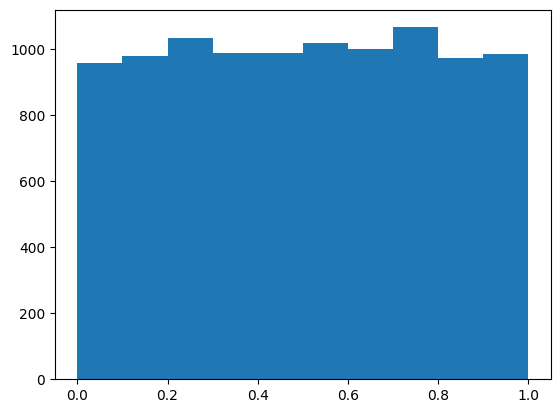

In [168]:
import matplotlib.pyplot as plt

plt.hist(df.a);

* ... or `DataFrame.hist`
* Plotting defaults are different, otherwise same functionality
* Useful for one-liners and quick visualization

<Axes: >

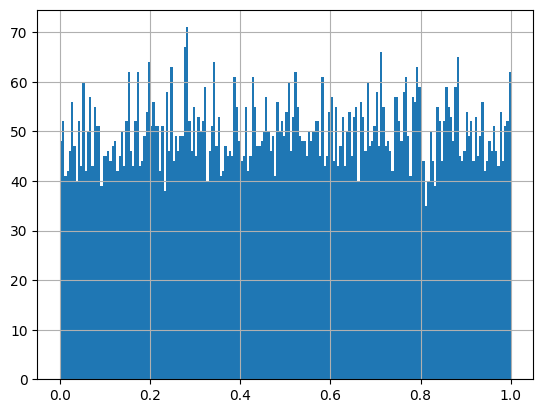

In [165]:
df["a"].hist(bins=200)

* Multiple plots end up in the same figure by default

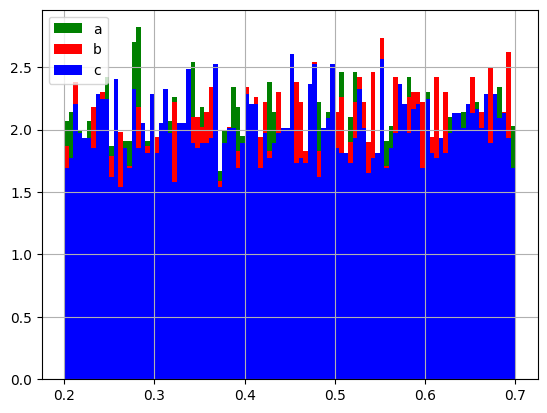

In [169]:
df["a"].hist(bins=100,
             range=(0.2, 0.7),
             label="a",
             color="green",
             density=True)
df["b"].hist(bins=100, range=(0.2, 0.7), label="b", color="red", density=True)
df["c"].hist(bins=100, range=(0.2, 0.7), label="c", color="blue", density=True)
plt.legend(loc="best");

## Exercise
 - Read in the files from "/ceph/programmierkurs/pandas/B2HHH_*.root" 
 - The files contain real data taken by the lhcb experiment
 - Take a look at the data and try to understand what the data represents (### have a look inside, discuss, ask us)
 - Calculate the total momentum of each kaon
 - Calculate the energy of each kaon
 - Calculate the energy, momentum and invariant mass of the B mesons
 - Make a histogram of the invariant B meson mass
 - You can ask us if you need further selection exercises

In [ ]:
import uproot

files = [
    "/ceph/programmierkurs/pandas/B2HHH_MagnetUp.root",
    "/ceph/programmierkurs/pandas/B2HHH_MagnetDown.root"
]
df = pd.DataFrame()
for file in files:
    with uproot.open(file) as f:
        df = pd.concat([df, f['DecayTree'].arrays(library="pd")],
                       ignore_index=True)